In [3]:
%pip install matplotlib tqdm

import matplotlib.pyplot as plt
import preprocess as pp
import torch
import torch
from write_data import write_data
from train import train_network

Note: you may need to restart the kernel to use updated packages.


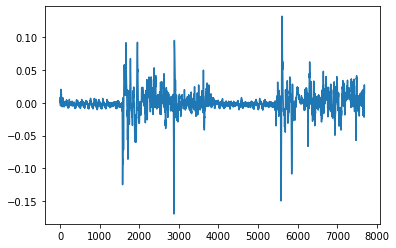

In [4]:
train_set = pp.convert_dataset("../data/Focus.csv")
plt.plot(pp.get_mean_values(train_set))
plt.show()

In [5]:
def labelize_set(train_set):
    result = list()
    for index, element in enumerate(train_set):
        if (index < 1500 or (index > 3900 and index < 5400)):
            result.append((element, 0))
        else:
            result.append((element, 1))
    return result
    
labelled_set = labelize_set(train_set)
focusedCount = 0
for signals, labels in labelled_set:
    if (labels == 0):
        focusedCount+=1

write_data(labelled_set, "../models/focusdata.csv")

In [10]:
from load_data import load_dataset

dataset = load_dataset("../models/focusdata.csv")

100%|██████████| 100/100 [00:23<00:00,  4.30it/s]


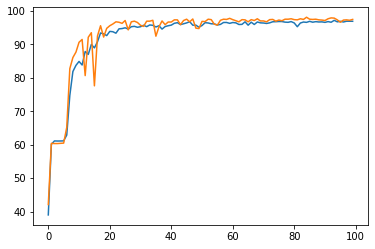

In [18]:
train_set, test_set = pp.split_data(labelled_set)

network, train_accuracies, test_accuracies = train_network(train_set, test_set)

plt.plot(train_accuracies)
plt.plot(test_accuracies)

In [15]:
torch.save(network.state_dict(), "../models/network.pt")